In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000702513"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000702513
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,Bank of Commerce Holdings
Ticker,BOCH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,37.0,6.363514e+00,1.908423e+00,3.94,5.23,5.8,6.76,1.218000e+01
interest income,49.0,1.860822e+09,1.294538e+10,6191000.00,9732000.00,10341000.0,10984000.00,9.062916e+10
net income,59.0,1.874100e+06,1.104127e+06,-960000.00,1305500.00,1801000.0,2289000.00,6.106898e+06
net interest income,59.0,8.224494e+06,3.209085e+06,3364000.00,5495500.00,8446000.0,9166000.00,2.201214e+07
provision for loan losses,59.0,1.006801e+06,1.375651e+06,0.00,0.00,200000.0,1550000.00,4.550000e+06
total revenue,1.0,1.764600e+07,NaN,17646000.00,17646000.00,17646000.0,17646000.00,1.764600e+07


# Plots

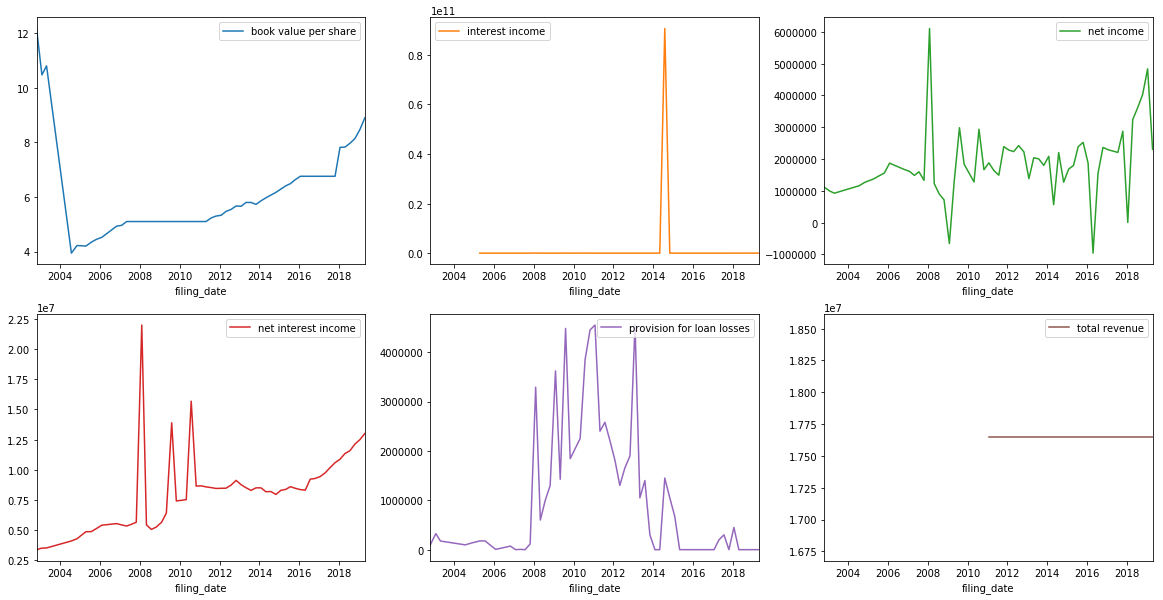

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000702513 book value per share        2003Q2 to 2004Q1: 4 periods  missing   
           book value per share                             2004Q4  missing   
           book value per share        2006Q1 to 2006Q2: 2 periods  missing   
           book value per share       2007Q2 to 2011Q1: 16 periods  missing   
           book value per share        2016Q1 to 2017Q3: 7 periods  missing   
           interest income            2002Q3 to 2004Q4: 10 periods  missing   
           interest income             2005Q2 to 2006Q2: 5 periods  missing   
           interest income                                  2006Q4  missing   
           interest income                                  2008Q4  missing   
           interest income                                  2009Q4  missing   
           net income                  2003Q2 to 2004Q1: 4 periods  missing   
           net income                                       2004Q4  missing   
           net income                  2006Q1 to 2006Q2: 2 periods  missing   
           net income                                       2009Q4  missing   
           net interest income         2003Q2 to 2004Q1: 4 periods  missing   
           net interest income                              2004Q4  missing   
           net interest income         2006Q1 to 2006Q2: 2 periods  missing   
           net interest income                              2009Q4  missing   
           provision for loan losses   2003Q2 to 2004Q1: 4 periods  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses   2006Q1 to 2006Q2: 2 periods  missing   
           provision for loan losses                        2009Q4  missing   
           total revenue              2002Q3 to 2010Q3: 33 periods  missing   
           total revenue              2011Q1 to 2019Q1: 33 periods  missing   

                                             message  
cik        item                                       
0000702513 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()